<a href="https://colab.research.google.com/github/Abs-CV/CV-Projects/blob/main/DeepNostalgia_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.4 MB/s eta 0:00:00


In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize  

In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize  
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!git clone https://github.com/AliaksandrSiarohin/first-order-model

Mounted at /content/gdrive
Cloning into 'first-order-model'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 337 (delta 15), reused 19 (delta 7), pack-reused 306
Receiving objects: 100% (337/337), 72.16 MiB | 12.98 MiB/s, done.
Resolving deltas: 100% (174/174), done.


In [ ]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 17.2 MB/s eta 0:00:00


In [ ]:
source_image = imageio.imread('https://fotozoneindia.com/wp-content/uploads/2015/07/01-5.jpg')
reader1 = imageio.get_reader('/content/gdrive/MyDrive/first-order-motion-model/00.mp4')

In [ ]:
def draw_image_with_boxes(filename, result_list):
	pyplot.imshow(frame)
	ax = pyplot.gca()
	for result in result_list:
		x, y, width, height = result['box']
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		ax.add_patch(rect)
	pyplot.show()

3/3 [==============================] - 0s 37ms/step


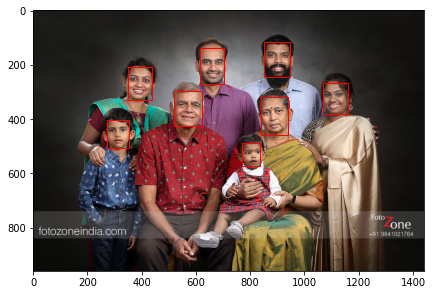

In [ ]:
frame=source_image
detector = MTCNN()
plt.figure(figsize=(7,7))
faces = detector.detect_faces(frame)
draw_image_with_boxes(frame, faces)

In [ ]:
rw=[]
rh=[]
for i in faces:
  j=(i['box'])
  rw.append(j[1]/3.75)
  rh.append(j[3]/3.75)
we=int(np.mean(rw))
he=int(np.mean(rh))
we,he

(74, 31)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

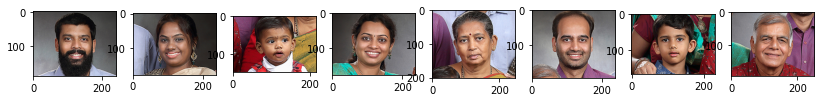

In [ ]:
# faces
f = plt.figure(figsize=(14,14))
count=1
imageb=[]
for i in faces:
  try:
    j=(i['box'])
    cropped_image = frame[j[1]-he:(j[1]+j[3])+he, j[0]-we:(j[0]+j[2]+we)]
    f.add_subplot(1,len(faces), count)
    imageb.append(cropped_image)
    count=count+1
    pyplot.imshow(cropped_image) 
  except:
    continue
pyplot

Which Image you want to be magical?5
(201, 247, 3)


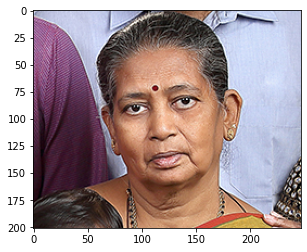

In [ ]:
ri=input("Which Image you want to be magical?")
KPPP=cv2.cvtColor(imageb[int(ri)-1], cv2.COLOR_BGR2RGB)
saveit=KPPP.shape
j=faces[int(ri)-1]['box']
saveita=[j[1]-he,(j[1]+j[3])+he, j[0]-we,(j[0]+j[2]+we)]
print(saveit)
cv2.imwrite("/content/input.png",KPPP)
KPPP1=cv2.cvtColor(KPPP, cv2.COLOR_BGR2RGB)
plt.imshow(KPPP1)
plt.show()

In [ ]:
source_image = imageio.imread('/content/input.png')
reader = reader1

In [ ]:
cd first-order-model

/content/first-order-model


In [ ]:
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                           checkpoint_path='/content/gdrive/My Drive/first-order-motion-model/vox-cpk.pth.tar')

In [ ]:
source_image = resize(source_image, (256, 256))[..., :3]

fps = reader.get_meta_data()['fps']
driving_video = []
try:
    for im in reader:
        driving_video.append(im)
except RuntimeError:
    pass
reader.close()

driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
HTML(display(source_image, driving_video).to_html5_video())

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save resulting video
imageio.mimsave('/content/generated0.mp4', [img_as_ubyte(frame) for frame in predictions], fps=fps)
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())

  0%|          | 0/265 [00:00<?, ?it/s]

In [ ]:
source_image = imageio.imread('/content/input.png')
driving_video = imageio.mimread('/content/gdrive/MyDrive/MYimagebucket/output_video (1).avi', memtest=False)

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)
imageio.mimsave('/content/generated2.mp4', [img_as_ubyte(frame) for frame in predictions], fps=fps)
HTML(display(source_image, driving_video, predictions).to_html5_video())

FileNotFoundError: ignored

In [ ]:
source_image = imageio.imread('/content/input.png')
driving_video = imageio.mimread('/content/gdrive/MyDrive/MYimagebucket/output_video (2).avi', memtest=False)

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)
imageio.mimsave('/content/generated1.mp4', [img_as_ubyte(frame) for frame in predictions], fps=fps)
HTML(display(source_image, driving_video, predictions).to_html5_video())

FileNotFoundError: ignored

In [ ]:
predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=False, adapt_movement_scale=True)
HTML(display(source_image, driving_video, predictions).to_html5_video())

100%|██████████| 198/198 [00:08<00:00, 24.51it/s]


In [ ]:
vidcap = cv2.VideoCapture('/content/generated1.mp4')
success,image = vidcap.read()
count = 0
picture=[]
while success:
  success,image = vidcap.read()
  count += 1
  if count%2==0:
    try:
      picture.append(cv2.resize(image, (saveit[1],saveit[0])))
    except:
      continue

In [ ]:
reuse=cv2.imread('/content/gdrive/My Drive/MYimagebucket/01-5.jpg')
frameSize = (reuse.shape[1],reuse.shape[0])
out = cv2.VideoWriter('/content/output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 12, frameSize)
for i in picture:
  reuse[saveita[0]:saveita[1], saveita[2]:saveita[3]]=i
  out.write(reuse)  
out.release()

In [ ]:
reuse.shape

(960, 1440, 3)